<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (*features* & *labels*)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

### Introduction to Regression with Neural Networks

**Regression** — predicting a numerical value based on some combination of variables

In [1]:
# Import TensorFlow
import tensorflow as tf
# Import NumPy and MatPlotLib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

### Creating data to view and fit

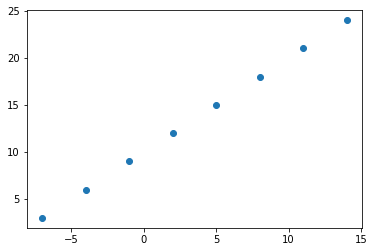

In [4]:
# Create features
_X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
_y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(_X, _y)

In [3]:
_y == _X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Check the X and y feature shapes
input_shape = _X[0].shape
output_shape = _y[0].shape
input_shape, output_shape

((), ())

In [6]:
_X[0].ndim

0

In [7]:
_X[0], _y[0]

(-7.0, 3.0)

In [8]:
_X[1], _y[1]

(-4.0, 6.0)

In [5]:
# Turn NumPy array into tensors with dtype float32
X = tf.constant(_X, dtype=tf.float32)
y = tf.constant(_y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** — define the `input` and `output layers`, as well as the `hidden layers` of a deep learning model.
2. **Compiling a model** — define the `loss function` (it tells our model how wrong it is) and the `optimizer` (it tells our model how to improve the patterns its learning) and `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fitting a model** — letting the model try to find patterns between `features` and `labels`

In [11]:
# Set a random seed
tf.random.set_seed(42)

In [12]:
# Create a model using the Sequential API
# The Input layer specifies that you are working with scalar inputs
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1)])

# Compile the model
## mae > Mean Absolute Error
## SGD > Stochastic Gradient Descent
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 463ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model

Improve the model by altering the steps taken in creating the model.
1. **Creating a model** — add more layer, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** — change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting a model** — fit a model for more `epochs` (leave it training for longer) or on more data (give the model more data to learn from)

In [15]:
# Rebuild the model

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 462ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [18]:
# Rebuild the model again

# Create the model (add a hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 636ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 9ms/step

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Predict
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [6]:
# Rebuild the model again

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model (change the optimizer, changing the learning_rate from 0.0001 to 0.01 brings the prediction much closer to the desired output)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 426ms/step - loss: 12.1609 - mae: 12.1609
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3278 - mae: 11.3278
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6124 - mae: 10.6124
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0261 - mae: 10.0261
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4192 - mae: 9.4192
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7912 - mae: 8.7912
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1514 - mae: 8.1514
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4961 - mae: 7.4961
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8157 - mae: 6.8157
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.1131 - mae: 6.1131
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - los

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Predict again (y should be near 27)
model.predict([17.0])

array([[26.43606]], dtype=float32)

### Evaluating a model

When evaluating it's a good idea to visualize:
* *The data* — what data are we working with? what does it look like?
* *The model itself* — what does our model look like?
* *The training of a model* — how does a model perform while it learns?
* *The predictions of the model* — how do the predictions of a model line up against the `ground truth` (`original labels`)?


In [7]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [8]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

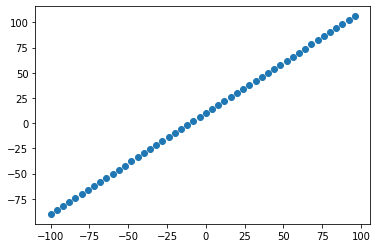

In [26]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Traninng set** — the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** — the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** — the model gets evaluated on this data to test what it has learned, this set is 10-15% of the total data available.

In [27]:
# Check how many samples we have
len(X)

50

In [9]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [10]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### Visualizing the data

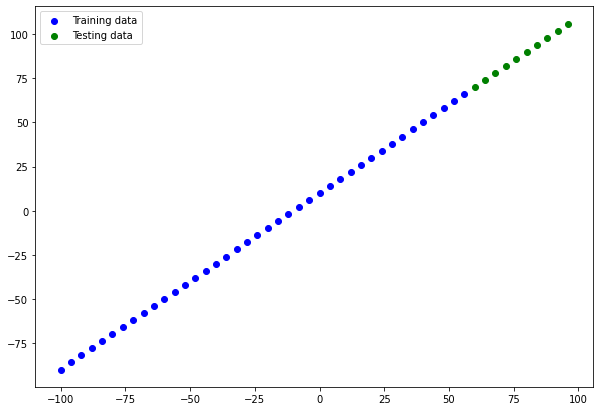

In [29]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend()
plt.legend()

In [30]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=100)

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** — total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** — these parameters aren't updated during training.

📖 **Resource:** [Introduction to Deep Learning](https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&ab_channel=AlexanderAmini)

In [34]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step -

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number parameters (total and trainable) by calling `model.summary()`

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 39.8475 - mae: 39.8475
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.2914 - mae: 16.2914
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1637 - mae: 11.1637
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 4.9952 - mae: 4.9952
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7159 - mae: 7.7159
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 6.2315 - mae: 6.2315
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 5.4419 - mae: 5.4419
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 4.7071 - mae: 4.7071
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 6.7339 - mae: 6.7339
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 5.5231 - mae: 5.5231
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 

In [16]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


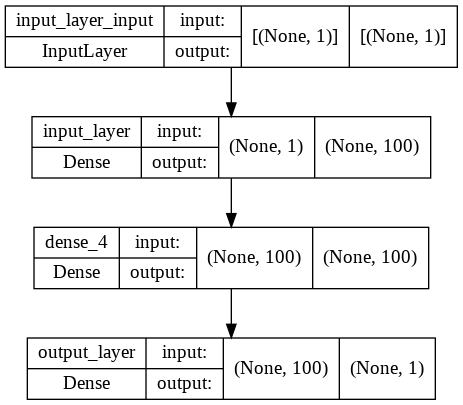

In [17]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing the model's prediction

It's a good idea to plot the model's predictions against the ground truth labels

`y_test` vs `y_pred`

In [60]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 69.48963 ],
       [ 73.47548 ],
       [ 77.46133 ],
       [ 81.44719 ],
       [ 85.43305 ],
       [ 89.4189  ],
       [ 93.40475 ],
       [ 97.390755],
       [101.3768  ],
       [105.36287 ]], dtype=float32)

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** It's a good idea to create a function if you're going to reuse some kind of functionality in the future

In [62]:
def plot_predictions(train_data=X_train, train_label=y_train,
                     test_data=X_test, test_label=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legends
  plt.legend()

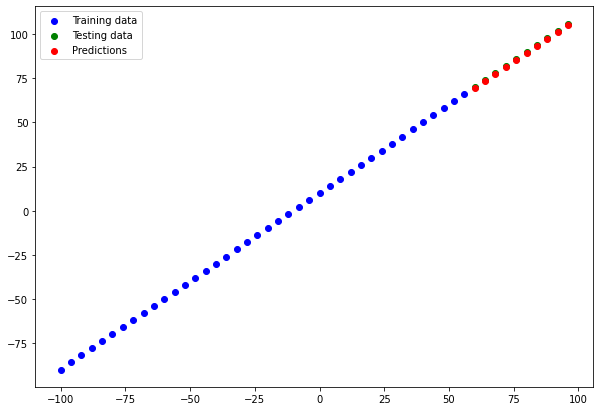

In [63]:
# Call the function
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

2 main metrics:
* `MAE` — Mean Absolute Error, used as a great starter metric for any regression problem.
* `MSE` — Mean Squared Error, used when larger errors are more significant than smaller errors.

In [64]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 0.5739 - mae: 0.5739


[0.5739242434501648, 0.5739242434501648]

In [66]:
# Calculate the Mean Absolute Error
mae = tf.keras.metrics.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.510368 , 15.219617 , 12.723204 , 11.021124 , 10.11339  ,
       10.       , 10.680949 , 12.1563015, 14.426081 , 17.490295 ],
      dtype=float32)>

In [67]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.48963 ],
       [ 73.47548 ],
       [ 77.46133 ],
       [ 81.44719 ],
       [ 85.43305 ],
       [ 89.4189  ],
       [ 93.40475 ],
       [ 97.390755],
       [101.3768  ],
       [105.36287 ]], dtype=float32)>

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [69]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.48963 ,  73.47548 ,  77.46133 ,  81.44719 ,  85.43305 ,
        89.4189  ,  93.40475 ,  97.390755, 101.3768  , 105.36287 ],
      dtype=float32)>

In [71]:
tf.cast(y_test, dtype=tf.float32) - tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.51036835, 0.5245209 , 0.5386734 , 0.55281067, 0.56694794,
       0.58110046, 0.595253  , 0.6092453 , 0.62319946, 0.63713074],
      dtype=float32)>

In [72]:
mae = tf.metrics.mae(tf.cast(y_test, dtype=tf.float32), tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.573925>

In [73]:
# Calculate the Mean Square Error
tf.metrics.mse(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([474.6338 , 342.96173, 243.06363, 174.93933, 138.58922, 134.01328,
       161.21129, 220.18625, 310.93878, 433.46924], dtype=float32)>

In [74]:
tf.metrics.mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.33102936>